# Colors and numpy

In [256]:
from typing import List
import PIL
from PIL import Image
print('Pillow Version:', PIL.__version__)
import numpy as np

Pillow Version: 8.1.0


## Utilities

Utility class to write and display a palette of colors

In [257]:

class PaletteWriter:
    def __init__(self, name: str):
        self.name = name
        self.colors = []
        
    def set_colors(self, colors: List):
        # Palette would be provided as [(R, G, B), ..]
        self.colors = colors
        return self
            
    def _create_image(self):
        number_of_colors = len(self.colors)
        block_size_pix = 50
        pixels = np.zeros((block_size_pix, number_of_colors*block_size_pix, 3)).astype(np.uint8)
        for i in range(number_of_colors):
            pixels[0:block_size_pix, i*block_size_pix:(i+1)*block_size_pix] = self.colors[i]
        new_img = Image.fromarray(pixels)
        return new_img
    
    def save(self):
        self._create_image().save(f"palette-{self.name}.png")
    
    def show(self):
        return self._create_image()

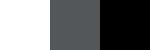

In [258]:
PaletteWriter("white-grey-black").set_colors([(255, 255, 255), (85, 86, 87), (0, 0, 0)]).show()

### Lightness

See (HSL, HSV, and HSI)(https://en.wikipedia.org/wiki/HSL_and_HSV_

#### Intensity

Average of the three color components

In [259]:
def intensity(rgb):
    r, g, b = rgb
    return int((1/3)*(r+g+b))

In [260]:
intensity((85, 86, 87))

86

#### Value

Largest component of a color

In [261]:
def max_value(rgb):
    r, g, b = rgb
    return max(r, g, b)

In [262]:
max_value((100, 86, 87))

100

#### Lightness

Average of the largest and smallest components of color.

In [263]:
def lightness(rgb):
    r, g, b = rgb
    return int((max(r, g, b) + min(r, g, b))/2)

In [264]:
lightness((100, 86, 87))

93

#### Luma

Weighted average of gamma-corrected R, G, and B, based on their contribution to perceived lightness.

Green will have the most weight while Blue the less.

In [265]:
 def luma(rgb):
    r, g, b = rgb
    kr, kg, kb = (0.2627, 0.6780, 0.0593) # (UHDTV, HDR)
    return int(kr*r+kg*g+kb*b)

In [266]:
luma((100, 86, 87))

89

### Chroma

The colorfulness relative to the brightness

The range of the color components

In [267]:
def chroma(rgb):
    r, g, b = rgb
    return int(max(r, g, b) - min(r, g, b))

In [268]:
chroma((100, 86, 87))

14

#### Hue

The attribute of a visual sensation.

The hue is typically measured in degrees [0°, 360°].

If Red is dominant, this is the range between Green and Blue modulo 6
If Green is dominant, this is the range between Blue and Red plus 2
If Blue is dominant, this is the range between Red and Green plus 4

In [269]:
def hue_ratio(rgb):
    r, g, b = rgb
    mx = max(r, g, b)
    c = chroma(rgb)
    if c == 0:
        return 0
    elif mx == r:
        return ((g-b)/c % 6)
    elif  mx == g:
        return (b-r)/c + 2
    elif mx== b:
        (r-g)/c + 4
        
def hue(rgb):
    return int(60*hue_ratio(rgb))

In [270]:
hue((100, 86, 87))

355

### Saturation

The colorfulness of a stimulus


#### Value saturation

In [271]:
def value_saturation(rgb):
    r, g, b = rgb
    c = chroma(rgb)
    v = max_value(rgb)
    return c/v if v>0 else 0

In [272]:
value_saturation((100, 86, 87))

0.14

#### Lightness saturation

In [273]:
def lightness_saturation(rgb):
    r, g, b = rgb
    c = chroma(rgb)
    l = lightness(rgb)
    if l == 0 or l == 1:
        return 0
    else:
        return c/(1-abs(2*l-1))

In [274]:
lightness_saturation((100, 86, 87))

-0.07608695652173914

Should it be negative ?

#### Intensity saturation

In [275]:
def lightness_saturation(rgb):
    r, g, b = rgb
    i = intensity(rgb)
    m = min(r, g, b)
    return 0 if i == 0 else 1-m/i

In [276]:
lightness_saturation((100, 86, 87))

0.05494505494505497

## Hue to RGB

### HSI to RGB

Given an HSI color with hue H ∈ [0°, 360°], saturation SI ∈ [0, 1], and intensity I ∈ [0, 1]

In [277]:
def hsi_to_rgb(hsi):
    h, s, i = hsi
    hratio = h/60
    z = 1-abs(hratio % 2 -1)
    c = 3*i*s/(1+z)
    x = c*z
    m = i*(1-s)
    if hratio < 1:
        return (c+m,x+m, m)
    elif hratio < 2:
        return (x+m,c+m, m)
    elif hratio < 3:
        return (m,c+m, x+m)
    elif hratio < 4:
        return (m,x+m, c+m)
    elif hratio < 5:
        return (x+m, m, c+m)
    elif hratio < 6:
        return (c+m, m, x+m)
        

In [278]:
hsi_to_rgb((180, 0.5, 0.5))

(0.25, 0.625, 0.625)

## Simple Palette

In [279]:
from random import randint, uniform 

class SimplePaletteDef:
    def __init__(self):
        self.nb_of_greys: int = 3
        self.nb_of_hues: int = 6
        self.nb_of_saturations: int = 3
        self.nb_of_intensities: int = 3
        self.colors = []
    
    def greys(self, value: int):
        self.nb_of_greys = value
        return self
    
    def hues(self, value: int):
        self.nb_of_hues = value
        return self

    def saturations(self, value: int):
        self.nb_of_saturations = value
        return self

    def intensities(self, value: int):
        self.nb_of_intensities = value
        return self
    
    def combinations(self):
        return self.nb_of_hues*self.nb_of_saturations*self.nb_of_intensities + self.nb_of_greys
    
    def make_size(self):
        self.colors = [(0, 0, 0)] *self.combinations()
    
    def set_color(self, hue: int, saturation: int, intensity: int, color):
        offset = self.nb_of_greys
        saturation_intensity = saturation*self.nb_of_intensities + intensity
        hue_saturation = hue*self.nb_of_saturations*self.nb_of_intensities + saturation_intensity
        self.colors[offset+hue_saturation] = color
        
    def random(self):
        self.make_size()
        for h in range(self.nb_of_hues):
            for s in range(self.nb_of_saturations):
                for i in range(self.nb_of_intensities):
                    hrange = int(360/self.nb_of_hues)
                    srange = 1/self.nb_of_saturations
                    irange = 1/self.nb_of_intensities
                    randhue = uniform(h*hrange, (h+1)*hrange )
                    randsat = uniform(s*srange, (s+1)*srange )
                    randintens = uniform(i*irange, (i+1)*irange )
                    randhsi = (randhue, randsat,randintens)
                    randcolor = hsi_to_rgb(randhsi)
                    r, g, b = hsi_to_rgb(randhsi)
                    rgb = (int(r*255),int(g*255),int(b*255)) 
                    self.set_color(h, s, i, rgb)
        


In [280]:
palette5753 = SimplePaletteDef().greys(5).hues(7).saturations(2).intensities(3)
palette5753.combinations()

47

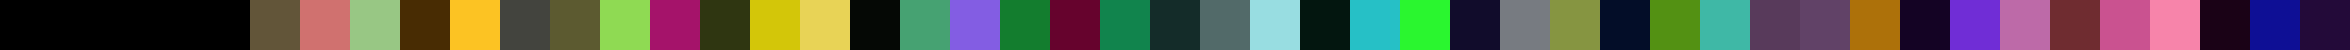

In [281]:
palette5753.random()
PaletteWriter("palette5753").set_colors(palette5753.colors).show()